In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [128]:
df = pd.read_csv("/content/aerofit_treadmill.csv")
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [129]:
df.shape

(180, 9)

In [130]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


As you see there are no NULLs and all are in correct datatype

In [132]:
stats_sum = df.describe(include="all")
stats_sum

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [133]:
numerical_features = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
for feature in numerical_features:
    mean = stats_sum.loc['mean', feature]
    median = df[feature].median()
    difference = abs(mean - median)
    print(f"{feature}: \n Mean = {mean}, Median = {median}, Difference = {difference}")

Age: 
 Mean = 28.788888888888888, Median = 26.0, Difference = 2.788888888888888
Education: 
 Mean = 15.572222222222223, Median = 16.0, Difference = 0.42777777777777715
Usage: 
 Mean = 3.4555555555555557, Median = 3.0, Difference = 0.4555555555555557
Fitness: 
 Mean = 3.311111111111111, Median = 3.0, Difference = 0.3111111111111109
Income: 
 Mean = 53719.57777777778, Median = 50596.5, Difference = 3123.0777777777766
Miles: 
 Mean = 103.19444444444444, Median = 94.0, Difference = 9.194444444444443


In [134]:
def va_un(x):
  a=df[x].value_counts()
  b=df[x].unique()
  print(f"Value counts in {x}: \n {a}")
  print(f"Unique values in {x}: \n {b}")

In [135]:
va_un("Product")

Value counts in Product: 
 Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64
Unique values in Product: 
 ['KP281' 'KP481' 'KP781']


In [136]:
va_un("Gender")

Value counts in Gender: 
 Gender
Male      104
Female     76
Name: count, dtype: int64
Unique values in Gender: 
 ['Male' 'Female']


In [137]:
va_un("MaritalStatus")

Value counts in MaritalStatus: 
 MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64
Unique values in MaritalStatus: 
 ['Single' 'Partnered']


## Detecting Outlier by IQR method

In [138]:
numerical_features

['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']

In [139]:
def det_outl(x):
  print(f"Feature: {x}")
  q3 = np.percentile(df[x],75)
  q1 = np.percentile(df[x],25)
  print(f"25 quartile = {q1} and 75 quartile = {q3}")
  iqr = q3 - q1
  print(f"IQR = {iqr}")
  up_w = q3 + (1.5* iqr)
  lw_w = q1 - (1.5* iqr)
  nr = len(df[(df[x]>up_w) | (df[x]<lw_w)])
  dr = len(df)
  perc_o = np.round((nr/dr)*100,2)
  print(f"Percentage of outlier in {x} is {perc_o} percent")

In [140]:
det_outl("Age")

Feature: Age
25 quartile = 24.0 and 75 quartile = 33.0
IQR = 9.0
Percentage of outlier in Age is 2.78 percent


In [141]:
det_outl("Education")

Feature: Education
25 quartile = 14.0 and 75 quartile = 16.0
IQR = 2.0
Percentage of outlier in Education is 2.22 percent


In [142]:
det_outl("Usage")

Feature: Usage
25 quartile = 3.0 and 75 quartile = 4.0
IQR = 1.0
Percentage of outlier in Usage is 5.0 percent


In [143]:
det_outl("Fitness")

Feature: Fitness
25 quartile = 3.0 and 75 quartile = 4.0
IQR = 1.0
Percentage of outlier in Fitness is 1.11 percent


In [144]:
det_outl("Income")

Feature: Income
25 quartile = 44058.75 and 75 quartile = 58668.0
IQR = 14609.25
Percentage of outlier in Income is 10.56 percent


In [145]:
det_outl("Miles")

Feature: Miles
25 quartile = 66.0 and 75 quartile = 114.75
IQR = 48.75
Percentage of outlier in Miles is 7.22 percent


## Visual Analysis

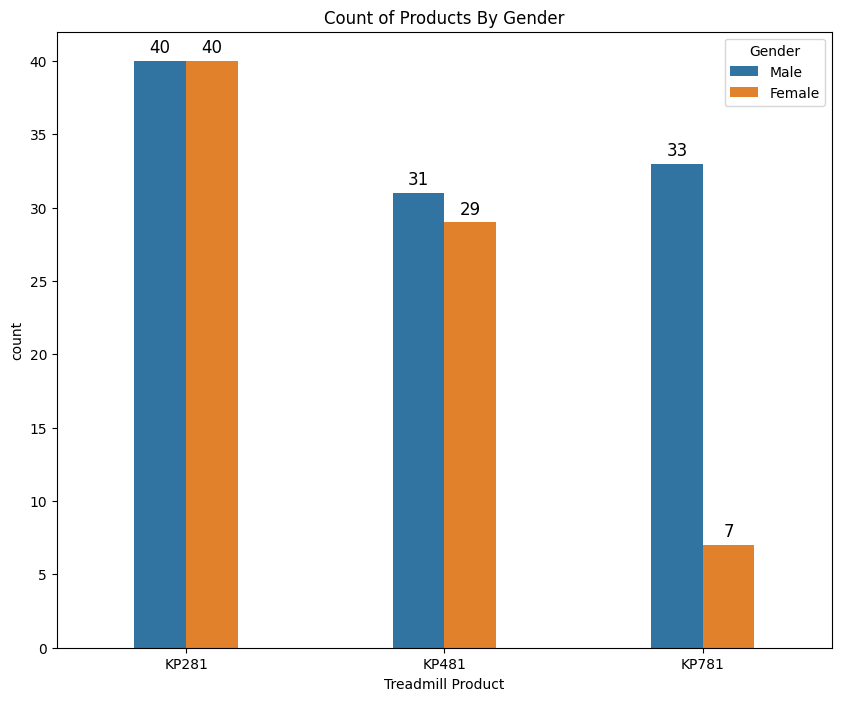

In [146]:
plt.figure(figsize=(10,8))
ax = sns.countplot(data=df, x="Product", hue="Gender", width=0.4)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=12, padding=3)
plt.xlabel('Treadmill Product')
plt.title("Count of Products By Gender")
plt.show()

As you see **KP281** and **KP481** is bought by both Male and Female almost.
But **KP781** bought by Males the most and Less by Female.

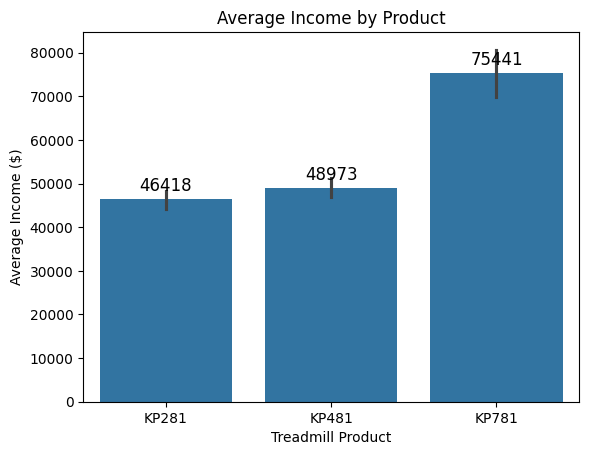

In [147]:
ax = sns.barplot(data=df, x='Product', y='Income')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=12, padding=3)
plt.title('Average Income by Product')
plt.xlabel('Treadmill Product')
plt.ylabel('Average Income ($)')
plt.show()

As you see the average income **"KP281"** and **"KP481"** are 46418 \$ and 48973 \$. But for **"KP781"** is 75445 \$.

So High income people Buying Most advanced Treadmill and Average and Low income people rely on Base and midlevel Models.


Text(0.5, 1.0, 'Count of Age across Male and Female')

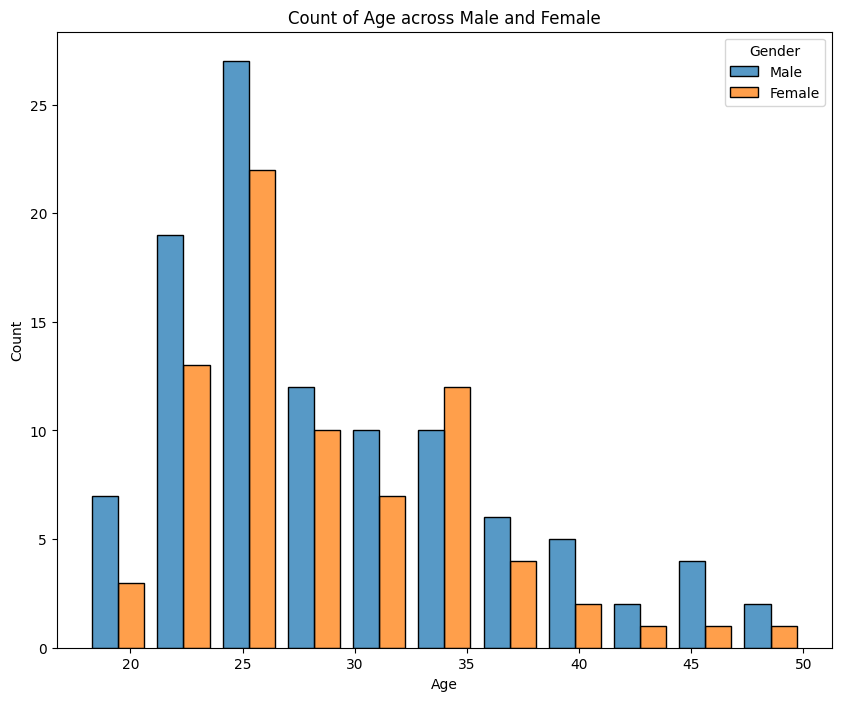

In [148]:
plt.figure(figsize=(10,8))
sns.histplot(data=df, x="Age", hue="Gender", multiple="dodge", shrink=0.8)
plt.title("Count of Age across Male and Female")

As you see Mostly males at all ages are buying the most treadmill product.

Between Age 20 and 27 most of people are buying the most.

Between Age 33 to 36 there is a unusual rise of female Buyers, indicates some reason for female clients to buy treadmills at that age.

In [149]:
bins = np.arange(15,59,7)
df['Age_Bins'] = pd.cut(df['Age'], bins=bins, right=False, labels=[f"{i}-{i+6}" for i in bins[:-1]])
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_Bins
0,KP281,18,Male,14,Single,3,4,29562,112,15-21
1,KP281,19,Male,15,Single,2,3,31836,75,15-21
2,KP281,19,Female,14,Partnered,4,3,30699,66,15-21
3,KP281,19,Male,12,Single,3,3,32973,85,15-21
4,KP281,20,Male,13,Partnered,4,2,35247,47,15-21
...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,36-42
176,KP781,42,Male,18,Single,5,4,89641,200,36-42
177,KP781,45,Male,16,Single,5,5,90886,160,43-49
178,KP781,47,Male,18,Partnered,4,5,104581,120,43-49


Text(0.5, 1.0, 'AgeBin Vs Average Income across MaritalStatus')

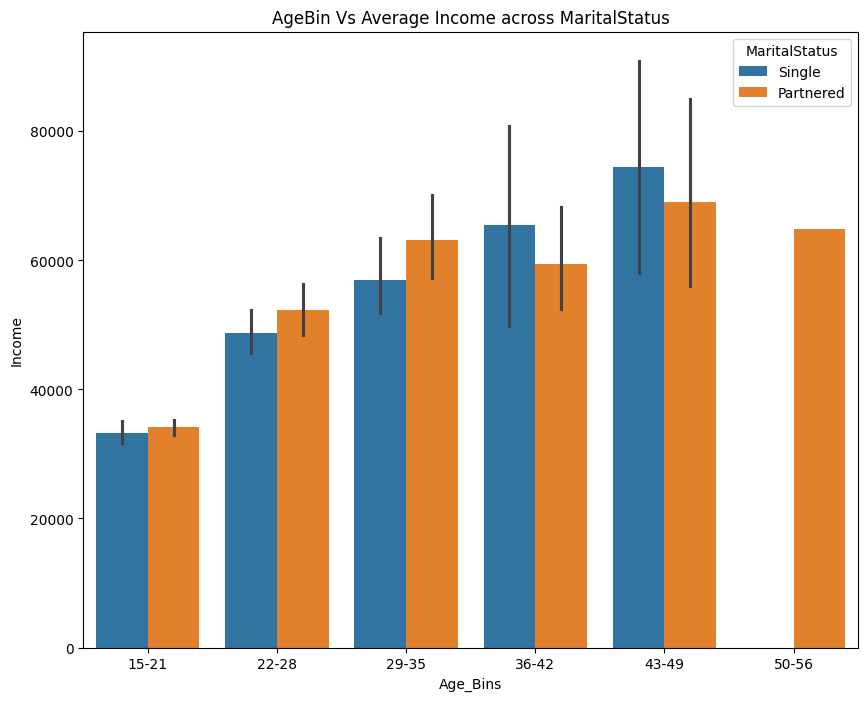

In [150]:
plt.figure(figsize=(10,8))
sns.barplot(data=df, x="Age_Bins", y="Income", hue="MaritalStatus")
plt.title("AgeBin Vs Average Income across MaritalStatus")

As AgeBin increase the Average Income also increases for both Single and Patnered.

Mostly Single having More Average Income across different AgeBins but between 29-35 age group Patnered having High average Income.



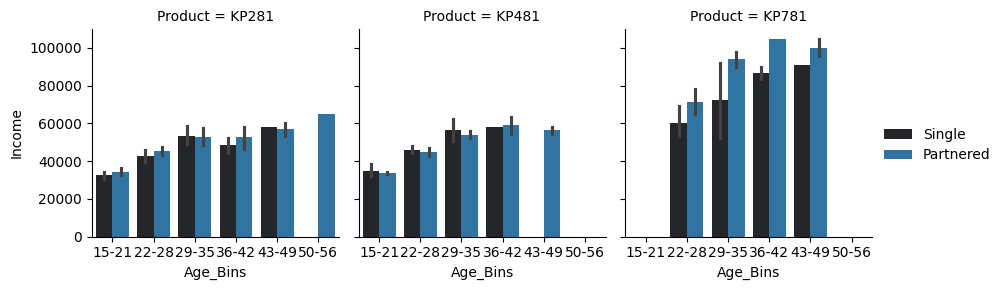

In [151]:
g = sns.FacetGrid(df, col="Product")
g.map_dataframe(sns.barplot, x="Age_Bins", y="Income", hue="MaritalStatus")
g.add_legend()
plt.show()

KP281:

For this Product all agebins are having average income between 25000 to 60000.
Average Income across single and patnered are almost same.

KP481:

For this Product all agebins are having average income between 30000 to 60000.
Here also Average Income across single and patnered are almost same.

KP781:

For this Product all agebins are having average income Above 60000.
Average Income across patnered are High compared to Single.



Text(0.5, 1.0, 'Age vs Income By Product')

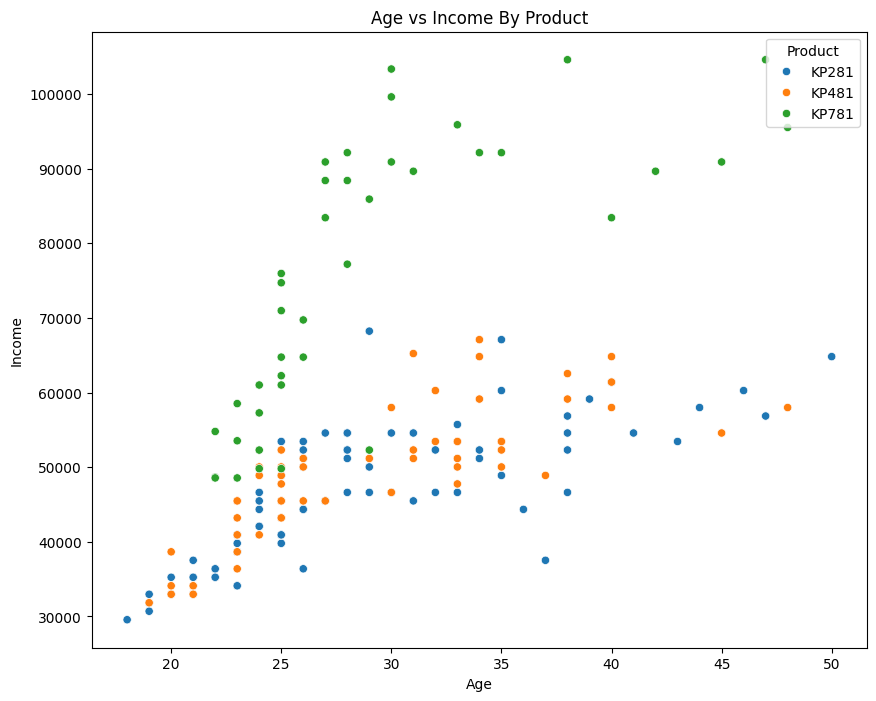

In [152]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x="Age", y="Income", hue="Product")
plt.title("Age vs Income By Product")

As you see "KP781" is bought by high income people having atleast 50000 \$

As you notice here between Age 22 to 26 people having income between 50000 \$ to 60000 \$ itself buying "KP781".

But above 26 Age people buying "KP781" only they have income of above 80000 \$

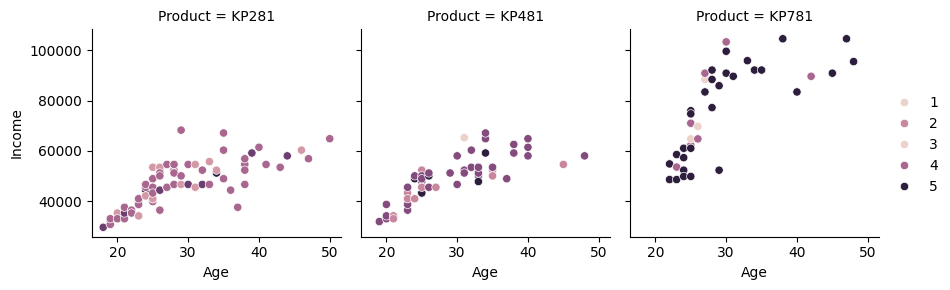

In [153]:
g = sns.FacetGrid(df, col="Product")
g.map_dataframe(sns.scatterplot, x="Age", y="Income", hue="Fitness")
g.add_legend()
plt.show()

KP281:

Mostly people who buy this product have fitness 3 and below.

KP481:

Mostly people who buy this product have fitness 4 and below(mostly 4 level) and with few having 5 level fitness.

KP781:

Mostly people buying this product having fitness 3 and above(mostly 5)

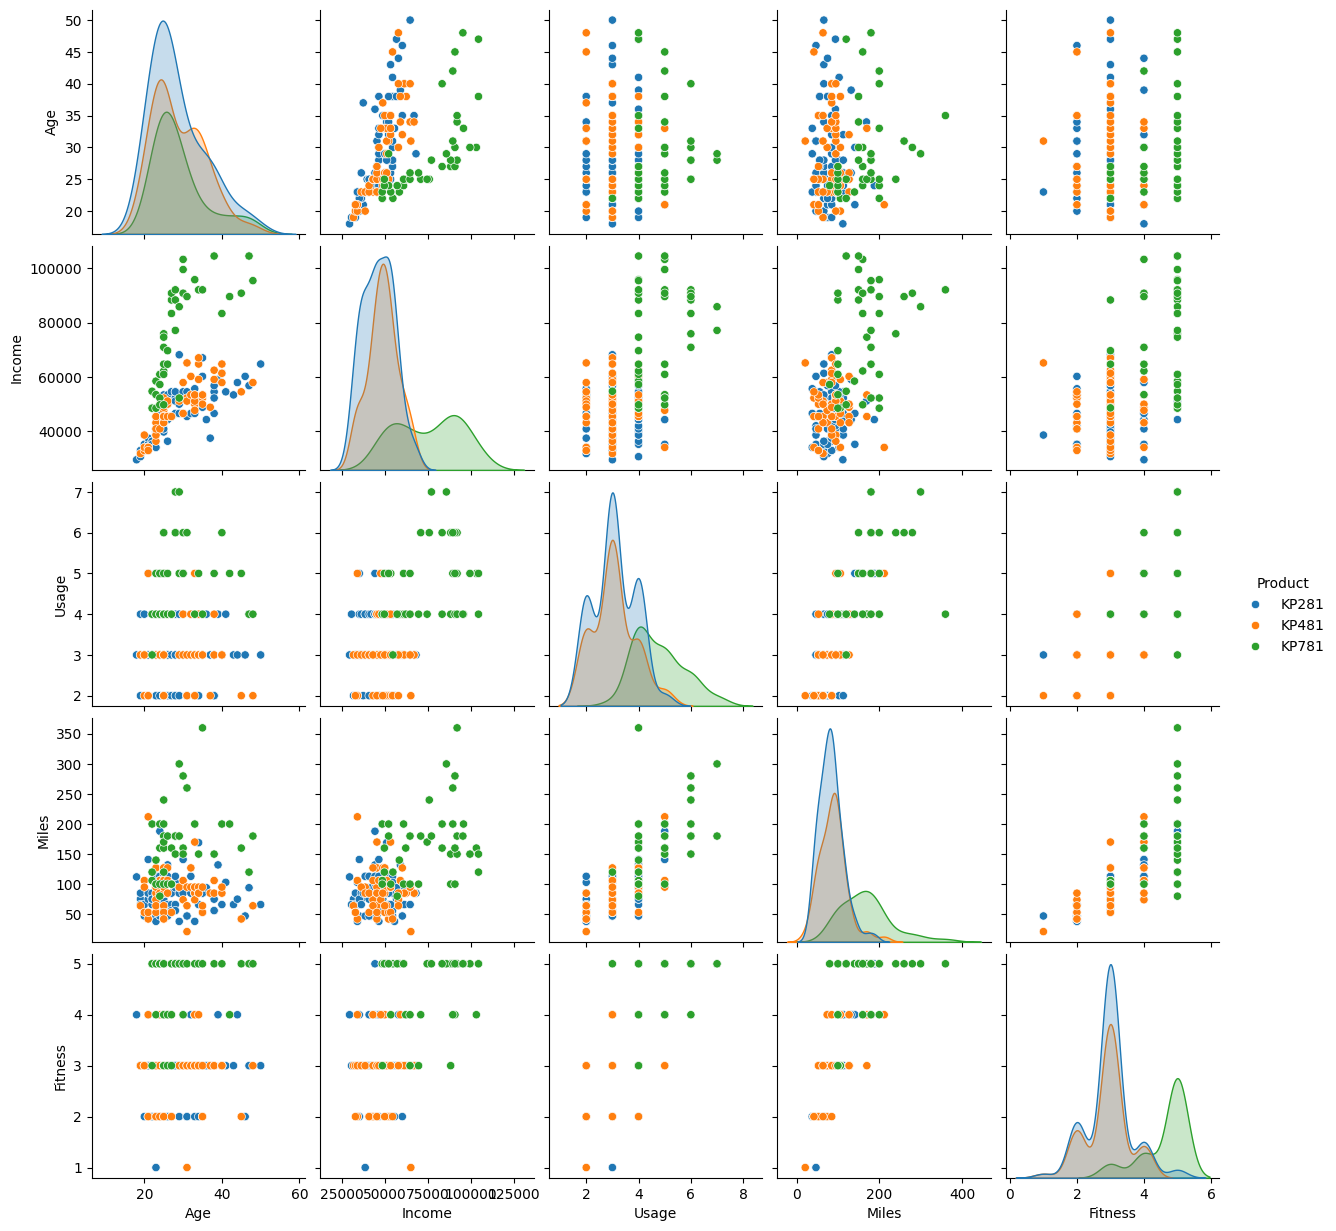

In [154]:
sns.pairplot(data=df, vars=['Age', 'Income', 'Usage', 'Miles','Fitness'],hue="Product")
plt.show()

In [155]:
bin_edges = [0, 50, 100, 150, 200, float('inf')]
labels = ['Below 50', '50-100', '100-150', '150-200', 'Above 200']
df['Miles_bin'] = pd.cut(df['Miles'], bins=bin_edges, labels=labels, right=False)
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_Bins,Miles_bin
0,KP281,18,Male,14,Single,3,4,29562,112,15-21,100-150
1,KP281,19,Male,15,Single,2,3,31836,75,15-21,50-100
2,KP281,19,Female,14,Partnered,4,3,30699,66,15-21,50-100
3,KP281,19,Male,12,Single,3,3,32973,85,15-21,50-100
4,KP281,20,Male,13,Partnered,4,2,35247,47,15-21,Below 50
...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,36-42,Above 200
176,KP781,42,Male,18,Single,5,4,89641,200,36-42,Above 200
177,KP781,45,Male,16,Single,5,5,90886,160,43-49,150-200
178,KP781,47,Male,18,Partnered,4,5,104581,120,43-49,100-150


Text(0.5, 1.0, 'Correlation Heatmap')

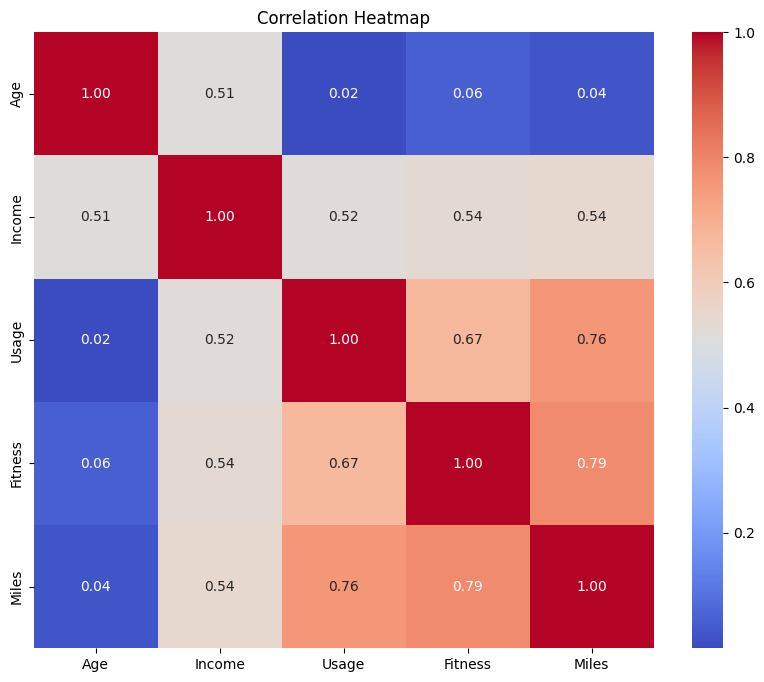

In [156]:
corr_matrix = df[['Age', 'Income', 'Usage', 'Fitness', 'Miles']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")

Firstly Fitness and Miles have High Correlation of 0.79.

Next Usage and Miles having correlation of 0.76.

Usage and Fitness are having score of 0.67

Income is correlated with Miles, Fitness, Usage, Age of 0.53 each approx.



Text(0.5, 1.0, 'MilesBin vs Income Distribution by Fitness')

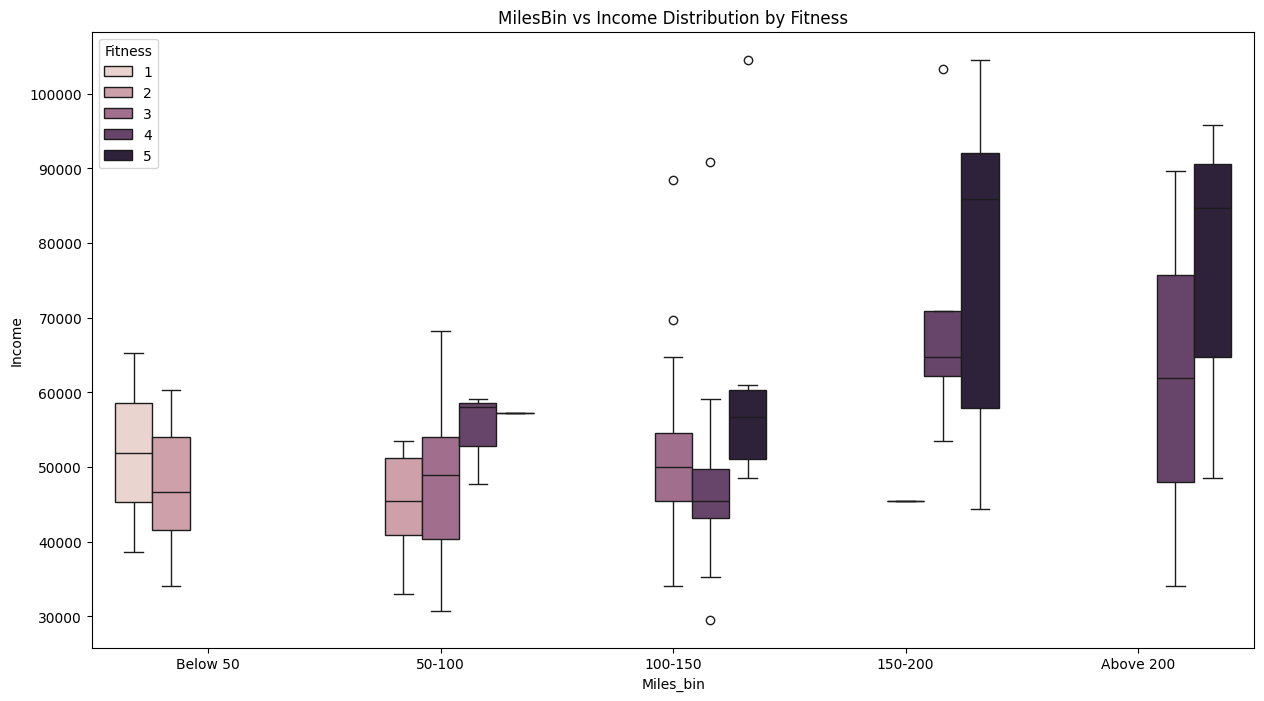

In [157]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df, x="Miles_bin",y="Income", hue="Fitness")
plt.title("MilesBin vs Income Distribution by Fitness")

**Below 50 Miles:**

For this people have low fitness 1 or 2 and 50% of people income ranges from 40000 to 60000.

**Between 50 to 150:**

Here people having fitness range from 2 to 5. Income range is varied for fitness level 3 between 50 to 100.

Between 100 to 150 income range is varied for both fitness level 3 and 5.

**150 and above:**

Here people are from fitness level 4 and 5 only. between 150 to 200 income range is highly varied for fitness level 5.

Above 200 both fitness 4 and 5 havinh high varied income range.

Text(0.5, 1.0, 'AgeBin vs Income Distribution by Product')

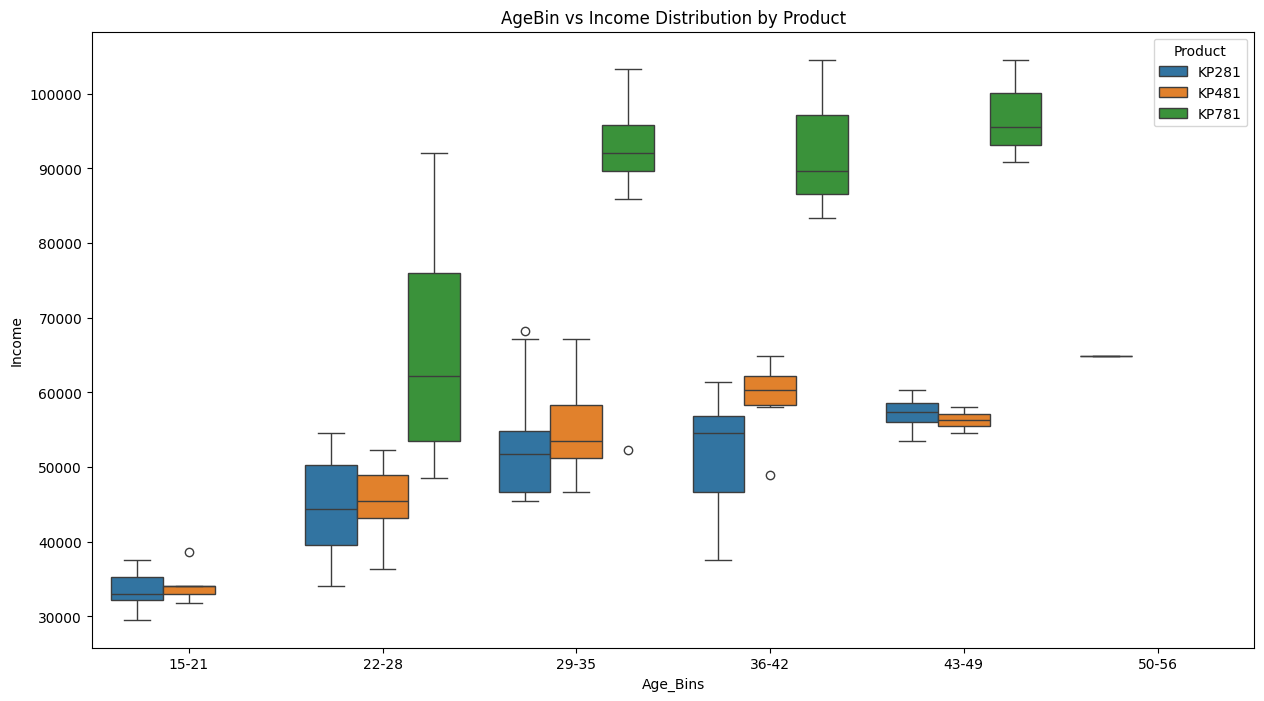

In [158]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df, x="Age_Bins",y="Income", hue="Product")
plt.title("AgeBin vs Income Distribution by Product")

**Below 26 Age:**

Most people buy KP281 and KP481 products having low income below 50000 \$.

**Between 26 and 40:**

Most people Buying KP781 are having 50000 and above income.
Some poeple Buying KP281 and KP481 are having income level between 40000 to 60000 \$.

**Above 40:**

All people buying KP781 are having 85000 \$ and above.
All people buying KP281 and KP481 are having income between 50000 to 70000 \$.

# Probabilities Computation

## Probabilities of product

In [159]:
for i in df["Product"].unique():
  nu = len(df[df["Product"]==i])
  dr = len(df)
  p = np.round(nu/dr,2)
  print(f"Probability of Buying '{i}' ==>> {p}")


Probability of Buying 'KP281' ==>> 0.44
Probability of Buying 'KP481' ==>> 0.33
Probability of Buying 'KP781' ==>> 0.22


## Crosstab Gender and Product

In [160]:
gender_product_crosstab = pd.crosstab(df['Gender'], df['Product'],margins=True)
print(gender_product_crosstab)

Product  KP281  KP481  KP781  All
Gender                           
Female      40     29      7   76
Male        40     31     33  104
All         80     60     40  180


Marginal Probabilities of Gender

In [161]:
for i in df["Gender"].unique():
  nu = len(df[df["Gender"]==i])
  dr = len(df)
  p = np.round(nu/dr,2)
  print(f"Probability of {i} who buys the product ==>> {p}")


Probability of Male who buys the product ==>> 0.58
Probability of Female who buys the product ==>> 0.42


Conditional Probability of Product given Gender

In [162]:
print("Conditional Probabilities:")
for i in df["Gender"].unique():
  print(f"\nGiven {i}:")
  for j in df["Product"].unique():
    nu = len(df[(df["Gender"]==i) & (df["Product"]==j)])
    dr = len(df[df["Gender"]==i])
    p = np.round(nu/dr,2)
    print(f"Probability of product '{j}' given '{i}' ==>> {p}")
  print(50*"-")


Conditional Probabilities:

Given Male:
Probability of product 'KP281' given 'Male' ==>> 0.38
Probability of product 'KP481' given 'Male' ==>> 0.3
Probability of product 'KP781' given 'Male' ==>> 0.32
--------------------------------------------------

Given Female:
Probability of product 'KP281' given 'Female' ==>> 0.53
Probability of product 'KP481' given 'Female' ==>> 0.38
Probability of product 'KP781' given 'Female' ==>> 0.09
--------------------------------------------------


## Crosstab MaritalStatus and Product

In [163]:
marital_product_crosstab = pd.crosstab(df['MaritalStatus'], df['Product'], margins=True)
print(marital_product_crosstab)

Product        KP281  KP481  KP781  All
MaritalStatus                          
Partnered         48     36     23  107
Single            32     24     17   73
All               80     60     40  180


Marginal Probabilities of MaritalSatus

In [164]:
for status in df["MaritalStatus"].unique():
    numerator = len(df[df["MaritalStatus"] == status])
    denominator = len(df)
    probability = np.round(numerator / denominator, 2)
    print(f"Probability of {status} in the dataset ==>> {probability}")

Probability of Single in the dataset ==>> 0.41
Probability of Partnered in the dataset ==>> 0.59


Conditional Probability of Product given MaritalStatus

In [165]:
print("Conditional Probabilities:")
for status in df["MaritalStatus"].unique():
    print(f"\nGiven {status}:")
    for product in df["Product"].unique():
        numerator = len(df[(df["MaritalStatus"] == status) & (df["Product"] == product)])
        denominator = len(df[df["MaritalStatus"] == status])
        probability = np.round(numerator / denominator, 2)
        print(f"Probability of buying '{product}' given '{status}' ==>> {probability}")
    print("-" * 50)

Conditional Probabilities:

Given Single:
Probability of buying 'KP281' given 'Single' ==>> 0.44
Probability of buying 'KP481' given 'Single' ==>> 0.33
Probability of buying 'KP781' given 'Single' ==>> 0.23
--------------------------------------------------

Given Partnered:
Probability of buying 'KP281' given 'Partnered' ==>> 0.45
Probability of buying 'KP481' given 'Partnered' ==>> 0.34
Probability of buying 'KP781' given 'Partnered' ==>> 0.21
--------------------------------------------------


## Crosstab Fitness and Product

In [166]:
fitness_product_crosstab = pd.crosstab(df['Fitness'], df['Product'], margins=True)
print(fitness_product_crosstab)

Product  KP281  KP481  KP781  All
Fitness                          
1            1      1      0    2
2           14     12      0   26
3           54     39      4   97
4            9      8      7   24
5            2      0     29   31
All         80     60     40  180


Marginal Probabilities of Fitness

In [167]:
for fitness in df["Fitness"].unique():
    numerator = len(df[df["Fitness"] == fitness])
    denominator = len(df)
    probability = np.round(numerator / denominator, 2)
    print(f"Probability of Fitness level {fitness} Buyers in the dataset ==>> {probability}")

Probability of Fitness level 4 Buyers in the dataset ==>> 0.13
Probability of Fitness level 3 Buyers in the dataset ==>> 0.54
Probability of Fitness level 2 Buyers in the dataset ==>> 0.14
Probability of Fitness level 1 Buyers in the dataset ==>> 0.01
Probability of Fitness level 5 Buyers in the dataset ==>> 0.17


Conditional Probability of Product given Fitness

In [168]:
print("Conditional Probabilities:")
for fitness in df["Fitness"].unique():
    print(f"\nGiven Fitness level {fitness}:")
    for product in df["Product"].unique():
        numerator = len(df[(df["Fitness"] == fitness) & (df["Product"] == product)])
        denominator = len(df[df["Fitness"] == fitness])
        probability = np.round(numerator / denominator, 2)
        print(f"Probability of buying '{product}' given Fitness level {fitness} ==>> {probability}")
    print("-" * 50)

Conditional Probabilities:

Given Fitness level 4:
Probability of buying 'KP281' given Fitness level 4 ==>> 0.38
Probability of buying 'KP481' given Fitness level 4 ==>> 0.33
Probability of buying 'KP781' given Fitness level 4 ==>> 0.29
--------------------------------------------------

Given Fitness level 3:
Probability of buying 'KP281' given Fitness level 3 ==>> 0.56
Probability of buying 'KP481' given Fitness level 3 ==>> 0.4
Probability of buying 'KP781' given Fitness level 3 ==>> 0.04
--------------------------------------------------

Given Fitness level 2:
Probability of buying 'KP281' given Fitness level 2 ==>> 0.54
Probability of buying 'KP481' given Fitness level 2 ==>> 0.46
Probability of buying 'KP781' given Fitness level 2 ==>> 0.0
--------------------------------------------------

Given Fitness level 1:
Probability of buying 'KP281' given Fitness level 1 ==>> 0.5
Probability of buying 'KP481' given Fitness level 1 ==>> 0.5
Probability of buying 'KP781' given Fitness le

## Crosstab AgeBins and Product

In [169]:
age_bins_product_crosstab = pd.crosstab(df['Age_Bins'], df['Product'], margins=True)
print(age_bins_product_crosstab)

Product   KP281  KP481  KP781  All
Age_Bins                          
15-21        10      7      0   17
22-28        40     25     25   90
29-35        16     20      9   45
36-42         9      6      3   18
43-49         4      2      3    9
50-56         1      0      0    1
All          80     60     40  180


Marginal Probabilities of Agebins

In [170]:
for age_bin in df["Age_Bins"].unique():
    numerator = len(df[df["Age_Bins"] == age_bin])
    denominator = len(df)
    probability = np.round(numerator / denominator, 2)
    print(f"Probability of Age Between '{age_bin}' in the dataset ==>> {probability}")

Probability of Age Between '15-21' in the dataset ==>> 0.09
Probability of Age Between '22-28' in the dataset ==>> 0.5
Probability of Age Between '29-35' in the dataset ==>> 0.25
Probability of Age Between '36-42' in the dataset ==>> 0.1
Probability of Age Between '43-49' in the dataset ==>> 0.05
Probability of Age Between '50-56' in the dataset ==>> 0.01


Conditional Probability of Product given AgeBins

In [171]:
print("Conditional Probabilities:")
for age_bin in df["Age_Bins"].unique():
    print(f"\nGiven Age_Bin '{age_bin}':")
    for product in df["Product"].unique():
        numerator = len(df[(df["Age_Bins"] == age_bin) & (df["Product"] == product)])
        denominator = len(df[df["Age_Bins"] == age_bin])
        probability = np.round(numerator / denominator, 2)
        print(f"Probability of buying '{product}' given Age_Bin '{age_bin}' ==>> {probability}")
    print("-" * 50)

Conditional Probabilities:

Given Age_Bin '15-21':
Probability of buying 'KP281' given Age_Bin '15-21' ==>> 0.59
Probability of buying 'KP481' given Age_Bin '15-21' ==>> 0.41
Probability of buying 'KP781' given Age_Bin '15-21' ==>> 0.0
--------------------------------------------------

Given Age_Bin '22-28':
Probability of buying 'KP281' given Age_Bin '22-28' ==>> 0.44
Probability of buying 'KP481' given Age_Bin '22-28' ==>> 0.28
Probability of buying 'KP781' given Age_Bin '22-28' ==>> 0.28
--------------------------------------------------

Given Age_Bin '29-35':
Probability of buying 'KP281' given Age_Bin '29-35' ==>> 0.36
Probability of buying 'KP481' given Age_Bin '29-35' ==>> 0.44
Probability of buying 'KP781' given Age_Bin '29-35' ==>> 0.2
--------------------------------------------------

Given Age_Bin '36-42':
Probability of buying 'KP281' given Age_Bin '36-42' ==>> 0.5
Probability of buying 'KP481' given Age_Bin '36-42' ==>> 0.33
Probability of buying 'KP781' given Age_Bin '

## Crosstab MilesBin and Product

In [172]:
miles_bin_product_crosstab = pd.crosstab(df['Miles_bin'], df['Product'], margins=True)
print(miles_bin_product_crosstab)

Product    KP281  KP481  KP781  All
Miles_bin                          
Below 50      12      5      0   17
50-100        50     39      1   90
100-150       16     13     12   41
150-200        2      2     16   20
Above 200      0      1     11   12
All           80     60     40  180


Marginal Probabilities of MilesBin

In [173]:
for miles_bin in df["Miles_bin"].unique():
    numerator = len(df[df["Miles_bin"] == miles_bin])
    denominator = len(df)
    probability = np.round(numerator / denominator, 2)
    print(f"Probability of Miles between '{miles_bin}' the customer excepts to walk ==>> {probability}")

Probability of Miles between '100-150' the customer excepts to walk ==>> 0.23
Probability of Miles between '50-100' the customer excepts to walk ==>> 0.5
Probability of Miles between 'Below 50' the customer excepts to walk ==>> 0.09
Probability of Miles between '150-200' the customer excepts to walk ==>> 0.11
Probability of Miles between 'Above 200' the customer excepts to walk ==>> 0.07


Conditional Probability of Product given MilesBin

In [174]:
print("Conditional Probabilities:")
for miles_bin in df["Miles_bin"].unique():
    print(f"\nGiven Miles_bin '{miles_bin}':")
    for product in df["Product"].unique():
        numerator = len(df[(df["Miles_bin"] == miles_bin) & (df["Product"] == product)])
        denominator = len(df[df["Miles_bin"] == miles_bin])
        probability = np.round(numerator / denominator, 2)
        print(f"Probability of buying '{product}' given Miles between '{miles_bin}' the customer excepts to walk ==>> {probability}")
    print("-" * 50)

Conditional Probabilities:

Given Miles_bin '100-150':
Probability of buying 'KP281' given Miles between '100-150' the customer excepts to walk ==>> 0.39
Probability of buying 'KP481' given Miles between '100-150' the customer excepts to walk ==>> 0.32
Probability of buying 'KP781' given Miles between '100-150' the customer excepts to walk ==>> 0.29
--------------------------------------------------

Given Miles_bin '50-100':
Probability of buying 'KP281' given Miles between '50-100' the customer excepts to walk ==>> 0.56
Probability of buying 'KP481' given Miles between '50-100' the customer excepts to walk ==>> 0.43
Probability of buying 'KP781' given Miles between '50-100' the customer excepts to walk ==>> 0.01
--------------------------------------------------

Given Miles_bin 'Below 50':
Probability of buying 'KP281' given Miles between 'Below 50' the customer excepts to walk ==>> 0.71
Probability of buying 'KP481' given Miles between 'Below 50' the customer excepts to walk ==>> 0